# Обработка ЯМР спектров в python при помощи библиотеки nmrglue

* [сайт библиотеки](https://www.nmrglue.com/)
* [Документация](https://nmrglue.readthedocs.io/en/latest/index.html)

импортируем используемые библиотеки

In [1]:
import nmrglue as ng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузим папку с данными. Нужна целая директория со всеми сопутствующими файлами.

Проведём аподизацию и фурье преобразования. Для шумных спектров гуминовых веществ lb нужно задать порядка 0.0002-0.001. 

In [2]:
# загружаем папку с данными
dic, data = ng.bruker.read('data')

# стандартная процедура очистки спектров брукер от цифрового фильтра
data = ng.bruker.remove_digital_filter(dic, data)

# загружаем шкалу ppm
udic = ng.bruker.guess_udic(dic, data)
uc = ng.fileiobase.uc_from_udic(udic)
ppm_scale = uc.ppm_scale()

data = ng.proc_base.em(data, lb=0.001)         # exponent apodization - уменьшить lb для увеличения разрешения
data = ng.proc_base.fft(data)               # Fourier transform

Фазировать спектры гуминовых веществ автоматически получается плохо, поэтому вручную

In [4]:
# автофазирование
# data = ng.proc_autophase.autops(data, 'acme', p0=0.0, p1=0)

# ручное фазирование
data = ng.proc_autophase.manual_ps(data, notebook=True)

interactive(children=(FloatSlider(value=-0.0015926535897929917, description='phcorr0', max=3.141592653589793, …

Внесём найденные после ручного фазирования коэффициенты и внесем их функцию фазирования. Также включим в обработку функцию удаления мнимых частей и развернём данные в привчные вид - от больших ppm к меньшим

Перед загрузкой нужно перезагрузить блок с предварительной загрузкой и обработкой спектра

In [3]:
data = ng.proc_base.ps(data, p0=-193, p1=319)      # фазирование - подставляем найденные значения после ручного фазирования
data = ng.proc_base.di(data)                # discard the imaginaries
data = ng.proc_base.rev(data)               # reverse the data

Построим спектр

(220.0, 0.0)

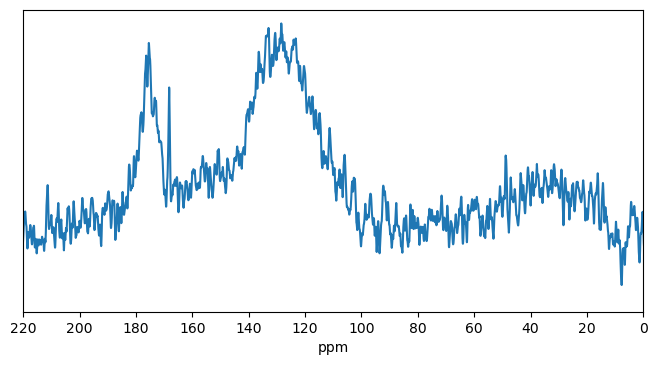

In [4]:
fig, ax = plt.subplots(figsize=(8,4), dpi=100)
ax.plot(ppm_scale, data)
ax.set_xlabel('ppm')
ax.set_yticks([])
ax.set_xticks(np.arange(0, 221, step=20))
ax.set_xlim(220, 0)

Сохраним данные в csv файл

In [5]:
df = pd.DataFrame(data=[], columns=['ppm', 'I'])
df['ppm'] = ppm_scale
df['I'] = data
df.to_csv('c13_nmr.csv', sep=';', index=False)